In [1]:
# Predicting Diabetes.

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df =  pd.read_csv('/home/mint/projects/diabetes/diabetes.csv')
print(df.head())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


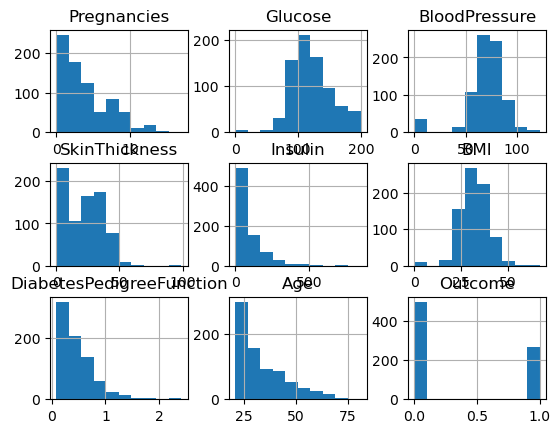

In [2]:

df.hist()

plt.show()


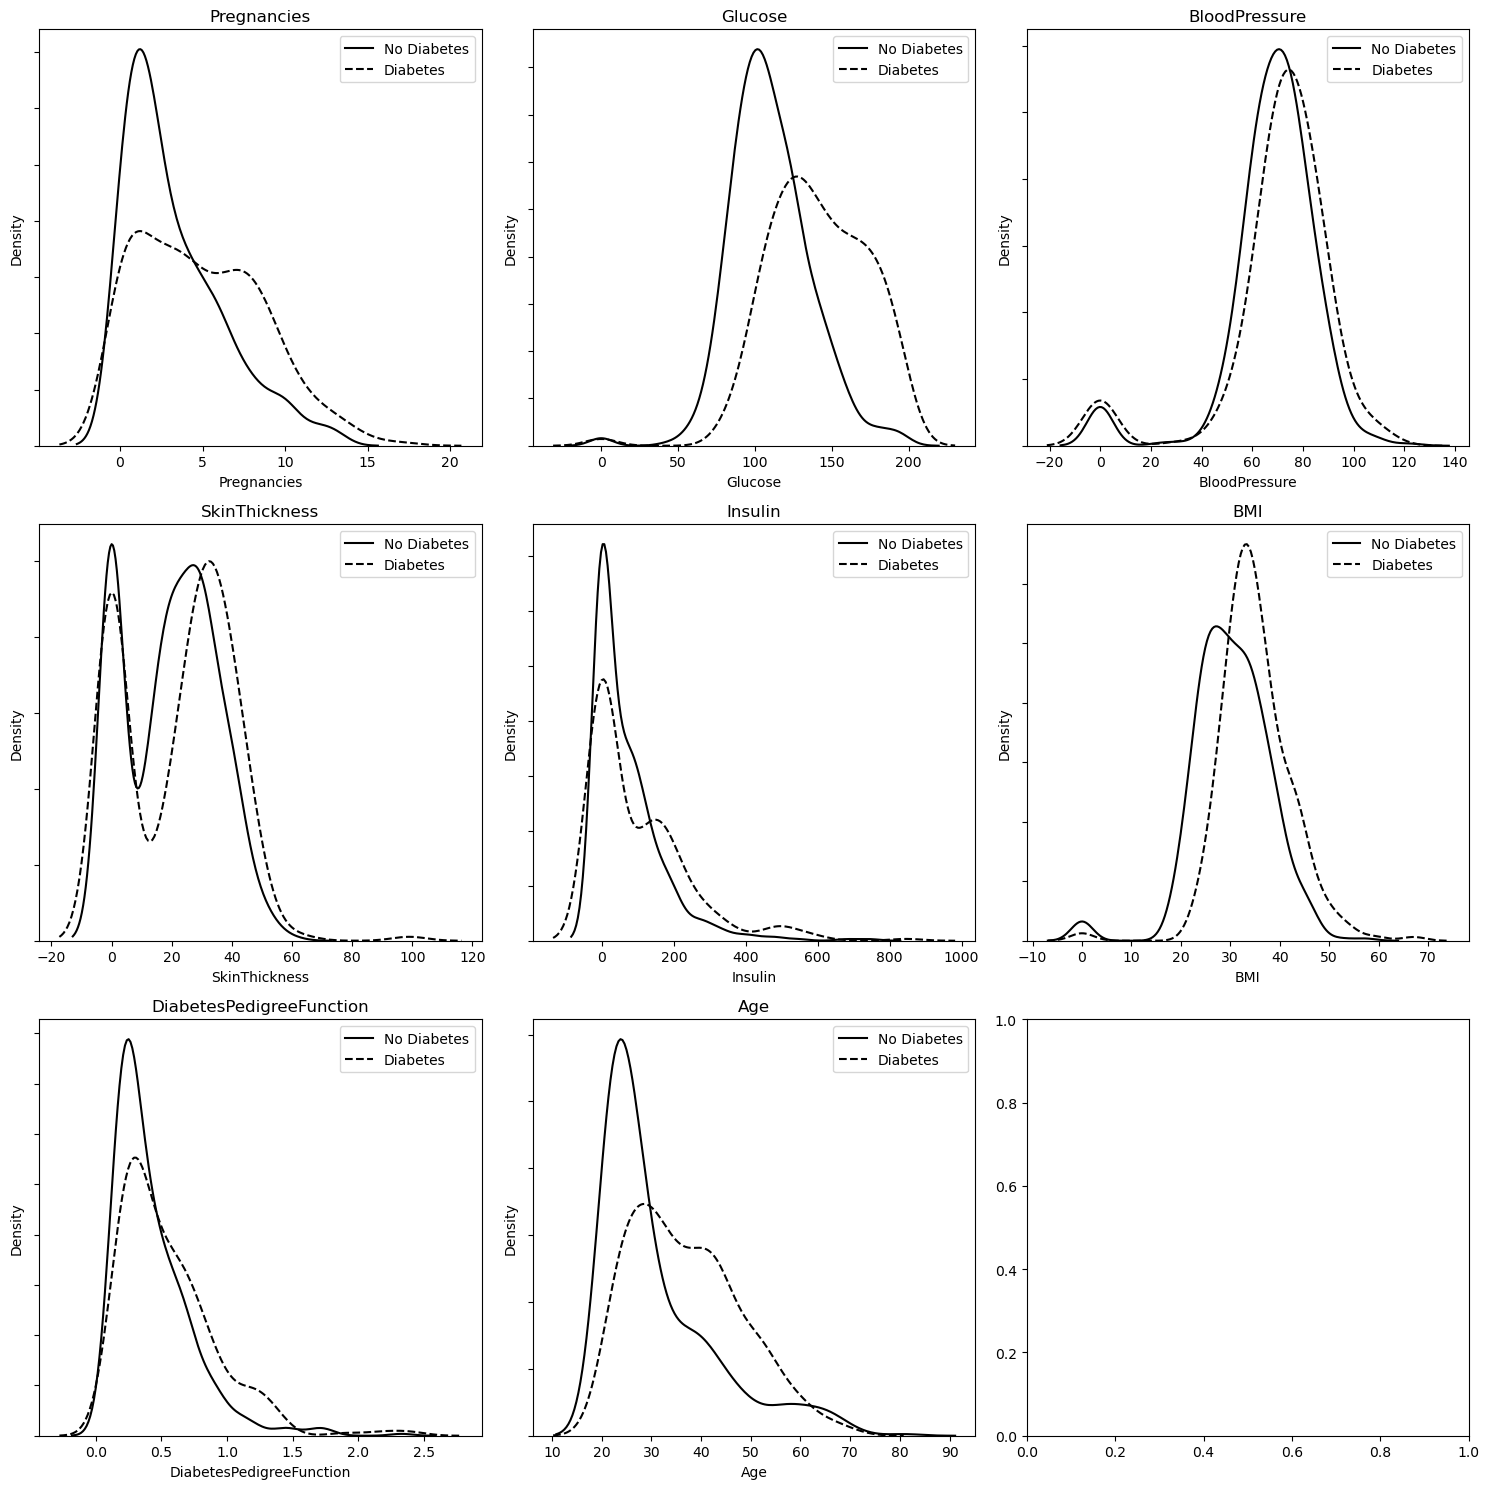

In [3]:

plt.subplots(3,3,figsize=(15,15))

for idx, col in enumerate(df.columns[:-1]):
    ax = plt.subplot(3, 3, idx+1)
    ax.yaxis.set_ticklabels([])

    plot_created = False

    if df.loc[df.Outcome == 0][col].nunique() > 1:  # For "No Diabetes"
        sns.kdeplot(df.loc[df.Outcome == 0][col], ax=ax, linestyle='-', color='black', label="No Diabetes")
        plot_created = True

    if df.loc[df.Outcome == 1][col].nunique() > 1:  # For "Diabetes"
        sns.kdeplot(df.loc[df.Outcome == 1][col], ax=ax, linestyle='--', color='black', label="Diabetes")
        plot_created = True

    
    
    if plot_created:
        ax.legend()

    ax.set_title(col)

# plt.subplot(3,3,9).set_visible( print(df.isnull().any())False)
plt.tight_layout()
plt.show()


In [4]:
 print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [5]:
 print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [6]:
 print("Number of rows with 0 values for each variable")
 for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [7]:


df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))



Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [8]:

df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

print(df.describe().loc[['mean', 'std','max'],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00           0.00           0.00     0.00  0.00   
std          1.00     1.00           1.00           1.00     1.00  1.00   
max          3.91     2.44           2.73           4.92     6.65  4.46   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


In [9]:

X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [10]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(32, activation='relu', input_dim=8))

model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2025-09-30 06:16:23.414385: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/mint/anaconda3/envs/ENV/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:

 # Train the model for 200 epochs

 model.fit(X_train, y_train, epochs=200)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6533 - loss: 0.6667
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6810 - loss: 0.6084
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7081 - loss: 0.5766 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7475 - loss: 0.5446
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7656 - loss: 0.5111 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7730 - loss: 0.4976 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7675 - loss: 0.5008
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7505 - loss: 0.5013
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7847 - loss: 0.4706
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7690 - loss: 0.4663 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7795 - loss: 0.4486
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accur

In [12]:

scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9314 - loss: 0.2276
Training Accuracy: 92.06%

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7632 - loss: 0.6123
Testing Accuracy: 77.92%



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Text(50.72222222222221, 0.5, 'Actual')

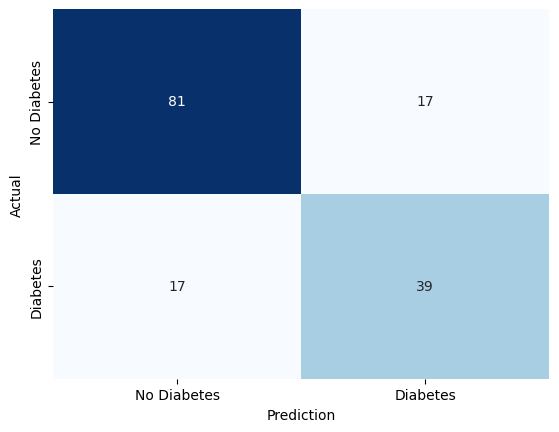

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype("int32")

c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Diabetes','Diabetes'], yticklabels=['No Diabetes','Diabetes'], cbar=False, cmap='Blues')

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Text(0, 0.5, 'True Positive Rate')

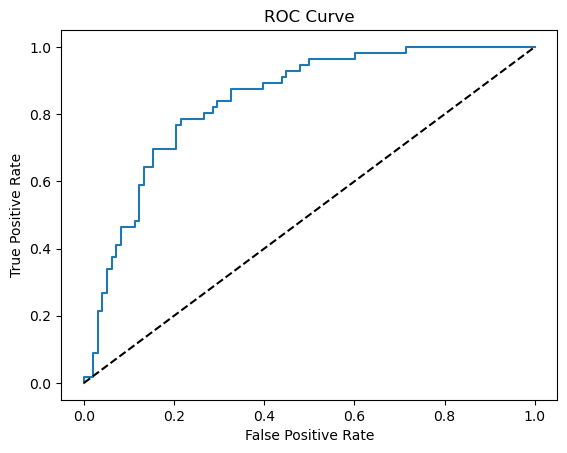

In [14]:

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_test_pred_probs = model.predict(X_test)

if y_test_pred_probs.shape[1] == 1:
    y_test_pred_probs = y_test_pred_probs[:, 0]
        
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')